In [9]:
%matplotlib inline
import pandas as pd

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [10]:
bikes= pd.read_csv("bike.csv",encoding= 'unicode_escape')
bikes

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


(array([3648., 1619., 1310.,  910.,  514.,  406.,  250.,   61.,   26.,
          16.]),
 array([   0. ,  355.6,  711.2, 1066.8, 1422.4, 1778. , 2133.6, 2489.2,
        2844.8, 3200.4, 3556. ]),
 <BarContainer object of 10 artists>)

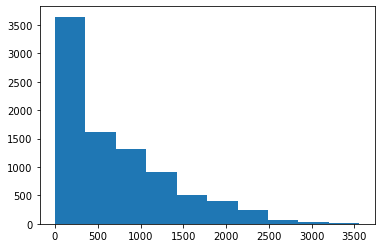

In [11]:
import matplotlib.pyplot as plt

plt.hist(bikes["Rented Bike Count"])

In [14]:
bikes.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


Gráficos de dispersão:


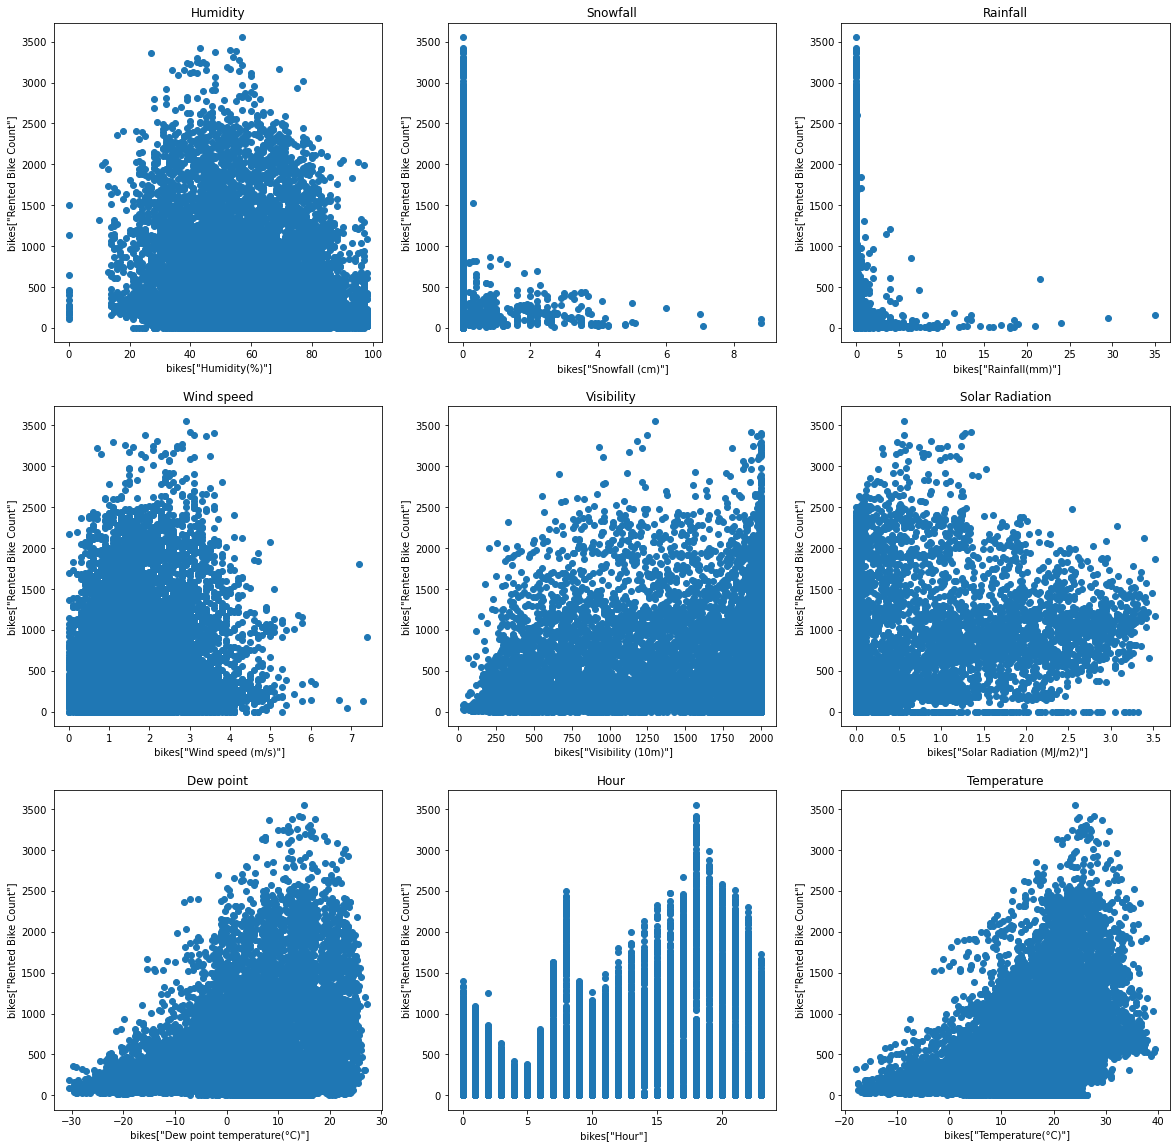

In [16]:
print("Gráficos de dispersão:")
fig = plt.figure(figsize=(20, 20))
plt.subplot(331)
plt.scatter( bikes['Humidity(%)'], bikes["Rented Bike Count"])
plt.title("Humidity")
plt.xlabel(' bikes["Humidity(%)"]')
plt.ylabel('bikes["Rented Bike Count"]')
plt.subplot(332)
plt.scatter( bikes['Snowfall (cm)'], bikes["Rented Bike Count"])
plt.title("Snowfall")
plt.xlabel(' bikes["Snowfall (cm)"]')
plt.ylabel('bikes["Rented Bike Count"]')
plt.subplot(333)
plt.scatter( bikes['Rainfall(mm)'], bikes["Rented Bike Count"])
plt.title("Rainfall")
plt.xlabel(' bikes["Rainfall(mm)"]')
plt.ylabel('bikes["Rented Bike Count"]')
plt.subplot(334)
plt.scatter( bikes['Wind speed (m/s)'], bikes["Rented Bike Count"])
plt.title("Wind speed")
plt.xlabel(' bikes["Wind speed (m/s)"]')
plt.ylabel('bikes["Rented Bike Count"]')
plt.subplot(335)
plt.scatter( bikes['Visibility (10m)'], bikes["Rented Bike Count"])
plt.title("Visibility")
plt.xlabel(' bikes["Visibility (10m)"]')
plt.ylabel('bikes["Rented Bike Count"]')
plt.subplot(336)
plt.scatter( bikes['Solar Radiation (MJ/m2)'], bikes["Rented Bike Count"])
plt.title("Solar Radiation")
plt.xlabel(' bikes["Solar Radiation (MJ/m2)"]')
plt.ylabel('bikes["Rented Bike Count"]')
plt.subplot(337)
plt.scatter( bikes['Dew point temperature(°C)'], bikes["Rented Bike Count"])
plt.title("Dew point")
plt.xlabel(' bikes["Dew point temperature(°C)"]')
plt.ylabel('bikes["Rented Bike Count"]')
plt.subplot(338)
plt.scatter( bikes['Hour'], bikes["Rented Bike Count"])
plt.title("Hour")
plt.xlabel(' bikes["Hour"]')
plt.ylabel('bikes["Rented Bike Count"]')
plt.subplot(339)
plt.scatter( bikes['Temperature(°C)'], bikes["Rented Bike Count"])
plt.title("Temperature")
plt.xlabel(' bikes["Temperature(°C)"]')
plt.ylabel('bikes["Rented Bike Count"]')
plt.show()

In [17]:
print("Correlação:")
bikes.corr()["Rented Bike Count"].sort_values()

Correlação:


Humidity(%)                 -0.199780
Snowfall (cm)               -0.141804
Rainfall(mm)                -0.123074
Wind speed (m/s)             0.121108
Visibility (10m)             0.199280
Solar Radiation (MJ/m2)      0.261837
Dew point temperature(°C)    0.379788
Hour                         0.410257
Temperature(°C)              0.538558
Rented Bike Count            1.000000
Name: Rented Bike Count, dtype: float64

As variáveis que mais influenciam, em ordem decrescente, a quantidade de bicicletas alugadas por hora são: 

Temperature(°C); 
Hour; 
Dew point temperature(°C); 
Solar Radiation (MJ/m2); 
Humidity(%);
Visibility (10m);
Snowfall (cm);
Rainfall(mm);
Wind speed (m/s)